# A genetic algorithm for parameter estimation

(**Lorenz system**) Find the best $\sigma, \rho, \beta$ for

\begin{align}
\frac{dx}{dt}&=\sigma(y-x) \\
\frac{dy}{dt}&=x(\rho-z)-y \\
\frac{dz}{dt}&=xy-\beta z
\end{align}

from the given data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy import linalg as LA

In [2]:
x = [1.0]
y = [1.0]
z = [1.0]

sigma = 10.0
rho = 28.0
beta = 8.0 / 3.0

dt = 0.01

for i in range(1000):
    new_x = x[i]+(sigma*(y[i]-x[i]))*dt
    new_y = y[i]+(x[i]*(rho-z[i])-y[i])*dt
    new_z = z[i]+(x[i]*y[i]-beta*z[i])*dt

    x.append(new_x)
    y.append(new_y)
    z.append(new_z)

x = np.array(x)
y = np.array(y)
z = np.array(z)

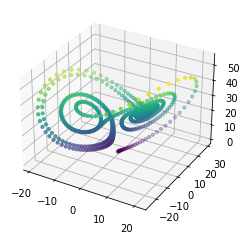

In [3]:
fig = plt.figure()
ax = fig.gca(projection="3d")

colors = (z*100)/np.max(z)
colors = colors.astype(int)

ax.scatter(x, y, z, c=colors, cmap='viridis', s=10)
plt.draw()
plt.show()

In [4]:
# maximum value of the variables in the function
max_sigma = 20
max_rho = 60
max_beta = 10

# number of variables, length of chromosome
m = 3

# number of chromosomes in population
n = 100

p_c = 1
p_m = 1

# maximum generation
N = 100

In [5]:
def createPopulation():
    pop = np.random.rand(n, m)
    pop[:,0] = pop[:,0]*max_sigma
    pop[:,1] = pop[:,1]*max_rho
    pop[:,2] = pop[:,2]*max_beta
    pop = pd.DataFrame(pop)
    pop.columns = ['sigma', 'rho', 'beta']

    return pop

In [6]:
def fitness(pop):
    fitness = np.zeros(n)
    
    for k in range(n):
        x2 = [1.0]
        y2 = [1.0]
        z2 = [1.0]

        sigma2, rho2, beta2 = pop.loc[k][0], pop.loc[k][1], pop.loc[k][2]

        for i in range(1000):
            new_x = x[i]+(sigma2*(y[i]-x[i]))*dt
            new_y = y[i]+(x[i]*(rho2-z[i])-y[i])*dt
            new_z = z[i]+(x[i]*y[i]-beta2*z[i])*dt

            x2.append(new_x)
            y2.append(new_y)
            z2.append(new_z)

        x2 = np.array(x2)
        y2 = np.array(y2)
        z2 = np.array(z2)

        error_x = LA.norm(x - x2)
        error_y = LA.norm(y - y2)
        error_z = LA.norm(z - z2)

        fitness[k] = error_x + error_y + error_z
    
    pop['fitness'] = fitness
    
    return pop

In [7]:
def randomSelection():
    position = np.random.permutation(n)
    
    return position[0], position[1]

In [8]:
def crossover(pop):
    popc = pop.copy()
    for i in range(n):
        a, b = randomSelection()
        x = (pop.loc[a] + pop.loc[b])/2
        popc.loc[i] = x
    
    return popc

In [9]:
def mutation(popc, i):
    popm = popc.copy()

    for i in range(n):
        for j in popm.columns:
            popm.loc[i][j] += (np.random.rand()-0.5)/(i+1)

    return popm

In [10]:
def combinePopulation(pop, popc, popm):
    popAll = pop.copy()
    popAll = popAll.append(popc)
    popAll = popAll.append(popm)

    popAll = popAll.drop_duplicates()

    popAll.index = range(len(popAll))

    return popAll

In [11]:
def sort(popAll):
    popAll = popAll.sort_values(by=['fitness'])
    
    popAll.index = range(len(popAll))

    return popAll

In [12]:
def elimination(popAll):
    pop = popAll.head(n)
    
    return pop

In [13]:
pop = createPopulation()
pop = fitness(pop)
print('Population 0 (Initial)')
print(pop)

for i in range(1, N+1):
    popc = crossover(pop)
    popc = fitness(popc)

    popm = mutation(popc, i)
    popm = fitness(popm)

    popAll = combinePopulation(pop, popc, popm)

    popAll = sort(popAll)

    pop = elimination(popAll)
    
    print()
    print('Population ' + str(i))
    print(pop)

Population 0 (Initial)
        sigma        rho      beta     fitness
0   14.631921  45.729436  2.172888   57.950723
1    8.724011  12.436312  2.588477   43.784626
2   19.781918  14.441629  7.606801   91.706046
3    4.221782  41.154869  9.122155   97.418216
4   14.465309  10.462937  9.110414  106.998670
..        ...        ...       ...         ...
95   6.937626  52.195122  0.941030   83.084155
96  18.545671  56.293595  3.603274   95.425804
97   4.755418  33.422297  0.460285   40.571001
98   2.406512  47.133891  5.805921   88.182714
99   1.526099  19.561899  2.593575   35.468318

[100 rows x 4 columns]

Population 1
        sigma        rho      beta    fitness
0    5.367809  27.143947  2.585042   9.781094
1    5.367296  27.140980  2.581271   9.821274
2   12.124616  26.561470  2.276003  10.214814
3   12.340113  29.047142  3.532398  13.471699
4   12.346000  29.052039  3.533163  13.499752
..        ...        ...       ...        ...
95  17.581134  18.760895  3.565374  43.185779
96  17.

In [15]:
x2 = [1.0]
y2 = [1.0]
z2 = [1.0]

sigma2, rho2, beta2 = pop.loc[0][0], pop.loc[0][1], pop.loc[0][2]

dt = 0.001

for i in range(100000):
    new_x = x2[i]+(sigma2*(y2[i]-x2[i]))*dt
    new_y = y2[i]+(x2[i]*(rho2-z2[i])-y2[i])*dt
    new_z = z2[i]+(x2[i]*y2[i]-beta2*z2[i])*dt

    x2.append(new_x)
    y2.append(new_y)
    z2.append(new_z)

x2 = np.array(x2)
y2 = np.array(y2)
z2 = np.array(z2)

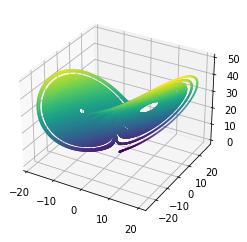

In [16]:
fig = plt.figure()
ax = fig.gca(projection="3d")

colors = (z2*100)/np.max(z2)
colors = colors.astype(int)

ax.scatter(x2, y2, z2, c=colors, cmap='viridis', s=1)
plt.draw()
plt.show()